In [1]:
# Leitura dos dados do arquivo CSV
import pandas as pd 

uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# Renomeação de colunas para melhor entendimento dos dados
mapa = {
    "unfinished" : "nao_finalizado",
    "expected_hours" : "horas_esperadas",
    "price" : "preco"
}

# Altera os nomes das colunas de acordo com o dicionário
dados = dados.rename(columns = mapa)

dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# Troca dos dados de uma coluna para melhor vizualização dos dados
troca = {
    0 : 1,
    1 : 0
}

# Cria uma nova coluna "finalizado" e mapea os dados de "nao_finalizado" invertendo os valores
dados['finalizado'] = dados.nao_finalizado.map(troca)

dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


## Vizualização dos dados em duas dimensões

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

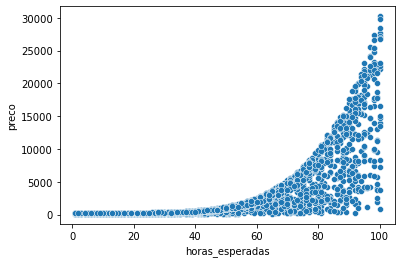

In [4]:
import seaborn as sns

# Construção do gráfico com os dados de horas_esperadas por preco da fonte de dados 
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

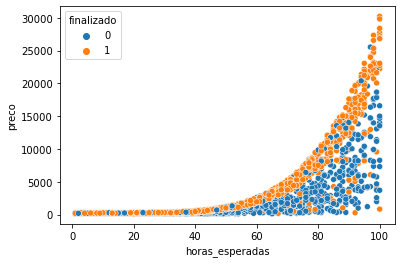

In [5]:
# Coloração dos finalizados e não_finalizados
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

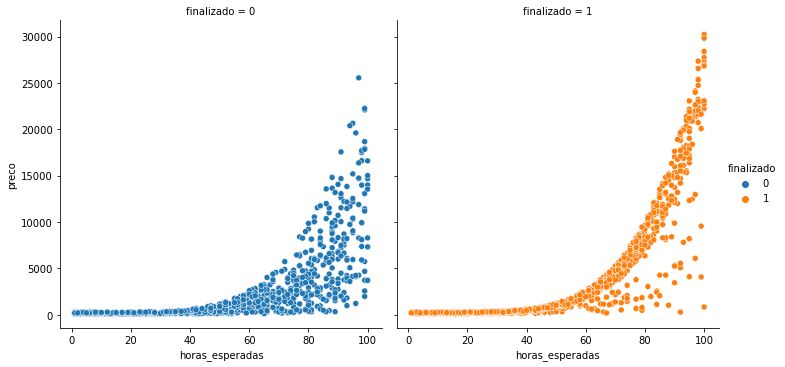

In [6]:
# Separação em dois gráficos diferentes com um novo método "replot"
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [7]:
# Separação entre os dados para analisar e os resultados
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi 51.48%


C:\Users\Cliente\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
# Cria uma matriz com 540 1's seguidos
previsoes_de_base = np.ones(540)

taxa_acerto = accuracy_score(teste_y, previsoes_de_base) * 100
print("A taxa de acerto do algoritmo de baseline foi %.2f%%" % taxa_acerto)

A taxa de acerto do algoritmo de baseline foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

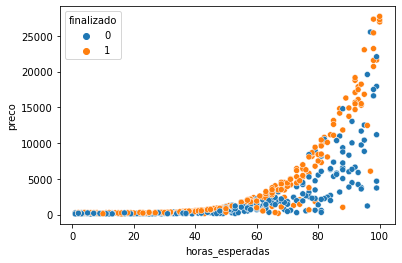

In [23]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [24]:
# Definição dos valores maximos e minimos de cada eixo
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print("x_min = %d, x_max = %d" % (x_min, x_max))
print("y_min = %d, y_max = %d" % (y_min, y_max))

x_min = 1, x_max = 100
y_min = 101, y_max = 27738


In [25]:
pixels = 100

# Divisão do espaço amostral de uma forma proporcional
eixo_x = np.arange(x_min, x_max, (x_max-x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min) / pixels)

eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [26]:
#Bruxaria de concatenação
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [27]:
# Matriz de 10.000 pontos
Z = model.predict(pontos)

# Remodelagem p/ Matriz 100x100
Z = Z.reshape(xx.shape)

Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

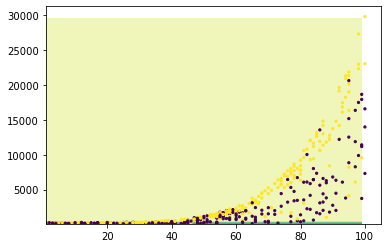

In [16]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)

## Uso de um novo classificador Não-Linear

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi 53.15%


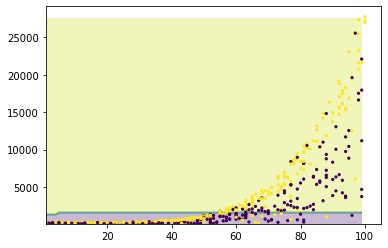

In [29]:
import matplotlib.pyplot as plt

# Definição dos valores maximos e minimos de cada eixo
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100

# Divisão do espaço amostral de uma forma proporcional
eixo_x = np.arange(x_min, x_max, (x_max-x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min) / pixels)

#Bruxaria de concatenação
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)

### Uso de um escalonador para melhorar a precisão do nosso modelo

    - Os dados estão em escalas bem diferentes para gerar um bom resultado

In [38]:
from sklearn.preprocessing import StandardScaler

# Método para separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Definição do fator de aleatoriedade para evitar mudanças na estimativa
SEED = 20
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Criação de uma nova escala para melhorar a analise dos dados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acerto = accuracy_score(teste_y, previsoes) * 100
print("A taxa de acerto foi %.2f%%" % taxa_acerto)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi 70.37%


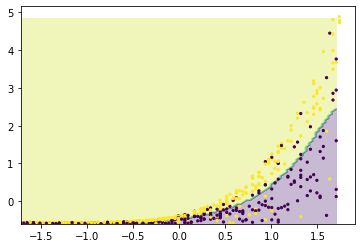

In [37]:
# Nova metodologia para pegar os dados que foram gerados a partir da nova escala
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

# Definição dos valores maximos e minimos de cada eixo
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100

# Divisão do espaço amostral de uma forma proporcional
eixo_x = np.arange(x_min, x_max, (x_max-x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min) / pixels)

#Bruxaria de concatenação
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=5)

#### Adaptação muito melhor da nossa curva de aprendizado